In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
train = pd.read_csv('playground-series-s3e10/train.csv')
test = pd.read_csv('playground-series-s3e10/test.csv')

In [24]:
train.head(10)

,id,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,0,133.171875,59.716081,0.043133,-0.703383,54.917224,70.084438,0.749798,-0.649512,0
1,1,87.093750,36.257973,0.435469,2.266057,3.417224,21.865069,7.039330,52.686251,0
2,2,112.640625,39.818393,0.379639,0.922306,2.730769,15.689690,8.193471,85.649785,0
3,3,120.679688,45.918448,-0.098490,0.011775,2.696488,20.954662,8.183874,70.332899,0
4,4,134.070312,57.720107,-0.107772,-0.573335,1.107860,11.255051,16.107748,308.753765,0
5,5,131.632812,52.563210,-0.075253,-0.495825,2.194816,15.537425,9.033439,97.032406,0
6,6,110.937500,41.556955,0.312844,0.559022,1.965719,17.191469,10.396774,118.724270,0
7,7,120.203125,49.927902,-0.089990,-0.321367,3.280100,18.376840,8.190561,77.917237,0
8,8,112.414062,46.939866,0.282551,0.151784,3.336957,21.929529,7.693330,65.186279,0
9,9,99.859375,48.089189,0.693710,0.281663,3.414716,24.181910,7.958684,65.084575,0


In [25]:
test.head(10)

,id,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve
0,117564,140.046875,54.507800,0.058862,-0.567263,2.337793,14.868335,9.591760,117.988781
1,117565,107.828125,51.578965,0.284368,-0.338430,1.574415,12.501437,11.694968,182.704822
2,117566,135.062500,49.812343,-0.087784,-0.094341,3.576923,21.243336,7.252386,59.021499
3,117567,112.812500,41.926647,0.519921,1.287762,6.669732,29.013153,5.097661,27.105240
4,117568,96.210938,35.322620,0.481286,2.443080,2.218227,17.041064,9.766006,117.131775
5,117569,46.570312,38.052829,3.646905,13.298871,22.328595,58.845597,2.338465,4.445249
6,117570,143.453125,47.702010,0.012830,-0.386832,2.795151,19.438935,8.177022,75.084575
7,117571,114.007812,43.570141,0.459937,0.715394,4.842809,24.056088,6.503427,46.363852
8,117572,138.203125,49.267816,-0.170860,-0.271264,6.133779,33.884439,5.189833,27.754611
9,117573,118.765625,52.817649,0.178871,-0.439846,3.093645,19.962993,8.025770,75.569414


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117564 entries, 0 to 117563
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    117564 non-null  int64  
 1   Mean_Integrated       117564 non-null  float64
 2   SD                    117564 non-null  float64
 3   EK                    117564 non-null  float64
 4   Skewness              117564 non-null  float64
 5   Mean_DMSNR_Curve      117564 non-null  float64
 6   SD_DMSNR_Curve        117564 non-null  float64
 7   EK_DMSNR_Curve        117564 non-null  float64
 8   Skewness_DMSNR_Curve  117564 non-null  float64
 9   Class                 117564 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 9.0 MB


In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78377 entries, 0 to 78376
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    78377 non-null  int64  
 1   Mean_Integrated       78377 non-null  float64
 2   SD                    78377 non-null  float64
 3   EK                    78377 non-null  float64
 4   Skewness              78377 non-null  float64
 5   Mean_DMSNR_Curve      78377 non-null  float64
 6   SD_DMSNR_Curve        78377 non-null  float64
 7   EK_DMSNR_Curve        78377 non-null  float64
 8   Skewness_DMSNR_Curve  78377 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 5.4 MB


In [28]:
train.isnull().sum()

id                      0
Mean_Integrated         0
SD                      0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
Class                   0
dtype: int64

In [29]:
test.isnull().sum()

id                      0
Mean_Integrated         0
SD                      0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
dtype: int64

In [30]:
train.duplicated().sum()

0

In [31]:
test.duplicated().sum()

0

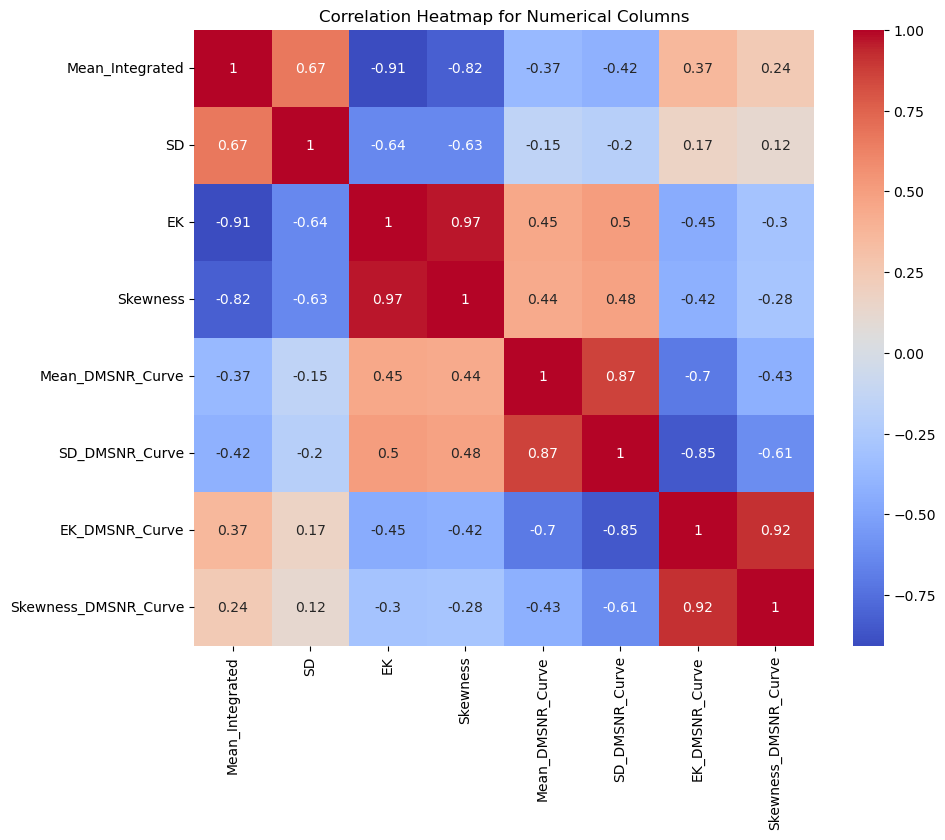

In [32]:
numerical_cols = ['Mean_Integrated', 'SD', 'EK', 'Skewness', 'Mean_DMSNR_Curve', 'SD_DMSNR_Curve', 'EK_DMSNR_Curve', 'Skewness_DMSNR_Curve']
plt.figure(figsize=(10, 8))
sns.heatmap(train[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

In [33]:
scaler = StandardScaler()
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])
train.head(10)

,id,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,0,0.880240,2.130547,-0.408455,-0.397482,1.607581,2.190105,-1.897360,-1.182197,0
1,1,-0.969814,-1.713208,-0.060358,0.058273,-0.319826,-0.215829,-0.259872,-0.515181,0
2,2,0.055902,-1.129811,-0.109893,-0.147968,-0.345517,-0.523953,0.040610,-0.102940,0
3,3,0.378674,-0.130280,-0.534109,-0.287718,-0.346800,-0.261254,0.038112,-0.294493,0
4,4,0.916312,1.803494,-0.542344,-0.377522,-0.406255,-0.745222,2.101103,2.687193,0
5,5,0.818446,0.958505,-0.513492,-0.365626,-0.365575,-0.531550,0.259297,0.039410,0
6,6,-0.012479,-0.844937,-0.169156,-0.203726,-0.374149,-0.449021,0.614243,0.310688,0
7,7,0.359540,0.526694,-0.526568,-0.338849,-0.324958,-0.389876,0.039853,-0.199643,0
8,8,0.046806,0.037086,-0.196033,-0.266229,-0.322830,-0.212613,-0.089602,-0.358856,0
9,9,-0.457270,0.225409,0.168764,-0.246295,-0.319920,-0.100229,-0.020517,-0.360128,0


In [34]:
X = train.drop(columns=['Class'])
y = train['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
xg_classifier = XGBClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)
xg_classifier.fit(X_train, y_train)

y_pred = xg_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

/Users/luwenkai/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:59:22] WARNING: /var/folders/c_/qfmhj66j0tn016nkx_th4hxm0000gp/T/abs_b6qk1lz_ug/croot/xgboost-split_1724073748391/work/src/learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9903882958363458
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     21318
           1       0.96      0.93      0.95      2195

    accuracy                           0.99     23513
   macro avg       0.98      0.96      0.97     23513
weighted avg       0.99      0.99      0.99     23513

Confusion Matrix:
 [[21238    80]
 [  146  2049]]


In [18]:
y_pred_test = xg_classifier.predict(test)

submission = pd.DataFrame({'id': test['id'], 'Class': y_pred_test})
submission.to_csv('submission.csv', index=False)

In [19]:
submission

,id,Class
0,117564,1
1,117565,1
2,117566,1
3,117567,1
4,117568,1
...,...,...
78372,195936,1
78373,195937,1
78374,195938,1
78375,195939,1
